/tmp/ipykernel_12239/3079802763.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


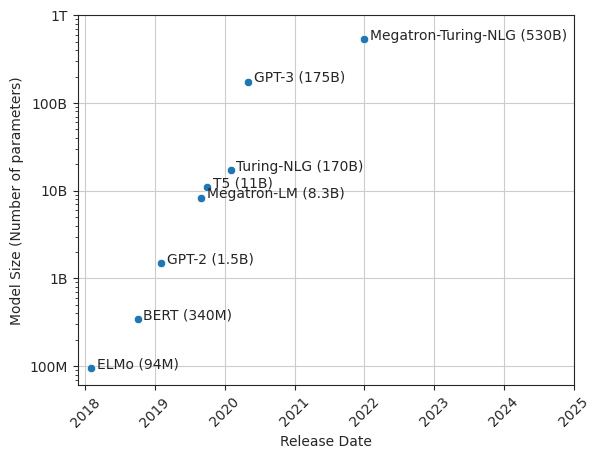

In [3]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import datetime
import numpy as np

data = pd.read_csv(os.path.abspath('') + '/model-size-over-time.csv',
                   parse_dates=True)
data['date'] = pd.to_datetime(data['date'])

sns.set_style("ticks", {'axes.grid': True})

ax = sns.scatterplot(data, x="date", y="parameters")
ax.set(yscale='log')
ax.set(xlabel='Release Date',
       ylabel='Model Size (Number of parameters)')
ax.yaxis.set_ticks([1e8, 1e9, 1e10, 1e11, 1e12])
ax.yaxis.set_ticklabels(["100M", "1B", "10B", "100B", "1T"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

x_dates = pd.date_range(start='2018-01-01', end='2025-06-01', freq='12MS')
ax.xaxis.set_ticks(x_dates)
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

for i, point in data.iterrows():
    ax.text(point['date'] + datetime.timedelta(days=30), point['parameters'],
            point['model'])

ax.figure.savefig('../../figures/model-size-over-time.pdf', bbox_inches="tight")